# Exploring the Influence of Social Life on Academics


### Silvia Camara, Brenna Leahy, Maria Gund


Our project will be based on a dataset from Kaggle that explores the effect of socioeconomic factors on students grades from a survey of students’ math and portuguese language courses in secondary school. The dataset contains data gathered from Portuguese students who were surveyed on several different aspects of their life, including familial and social relations as well as their academic habits and socio-economic status.We plan to use the data set to predict a student's final grade in a class based on different social factors, including the amount of time he or she spends going out with friends, the quality of their family relationships, whether they take part in after-school activities, as well as the size of their family. Using several features, we want to see if there is a correlation between a student's social life and their grades. We also want to see if there is one specific feature (or a combination of features) that better predicts whether a student's grade will be above average, average, or below average. 

We plan to explore this topic by using principal component analysis to determine which parts of the data are most useful as well as Naive Bayes to present the data comprehensively and analyze it.


In [11]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

# Read the file into a DataFrame.
math_data = pd.read_csv("student-mat.csv")
port_data = pd.read_csv("student-por.csv")

In [2]:
X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class

X_port = port_data.iloc[:, :-1]  # features
Y_port = port_data.iloc[:, -1]  # class

print("Math Data")
print(X_math.head())
print()
print(Y_math.head())
print("-----------------------------------------------")
print("Portuguese Data")
print(X_port.head())
print()
print(Y_port.head())


Math Data
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   5  
2       no      4         3      2     2    3      3       10   7   8  
3      yes      3         2      2     1    1      5        2  15  14  
4       no      4         3      2     1    2      5        4   6  10  

[5 rows x 32 columns]

0     6
1     6
2    10
3    15
4    10
Name: G3, dty

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets


school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.



## Math Data Set

In [3]:
# Output the first few rows of the math dataset.
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Portuguese Data Set

In [4]:
# Output the first few rows of the portuguese dataset.
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Binning the Data

## Math Data

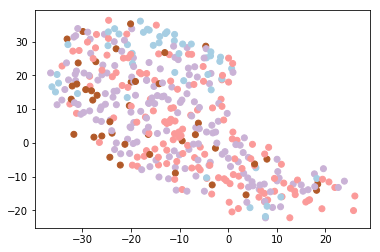

In [5]:
from sklearn.manifold import TSNE

bins = pd.cut(Y_math, 4, labels=False) #bin the final grade data into 3 bins

model = TSNE()
Y = model.fit_transform(pd.get_dummies(math_data.iloc[:, :-3]))

plt.scatter(Y[:, 0], Y[:, -1], c=bins, cmap=plt.cm.Paired)
plt.show()

## Portuguese Data

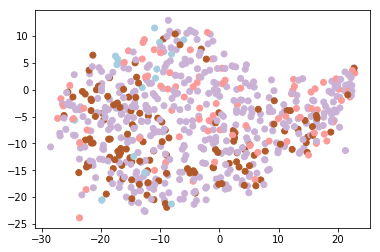

In [6]:
from sklearn.manifold import TSNE

bins = pd.cut(Y_port, 4, labels=False) #bin the final grade data into 3 bins

model = TSNE()
Y = model.fit_transform(pd.get_dummies(port_data.iloc[:, :-3]))

plt.scatter(Y[:, 0], Y[:, -1], c=bins, cmap=plt.cm.Paired)
plt.show()

# Logistic Regression

Note: The tick marks produced for all graphs are 20 on the Y-axis and 5 on the X-axis, however, because of the sheer numer of graphs (60), we iterated through all graphs with the same number of ticks for all of them. Some graphs with less than 5 tick marks such as Sex, will only render a graph with the appropriate space for 2 tick marks, leaving the rest of the graph blank.

## Math Data

   age  G3
0   18   6
1   17   6
2   15  10
3   15  15
4   16  10
1


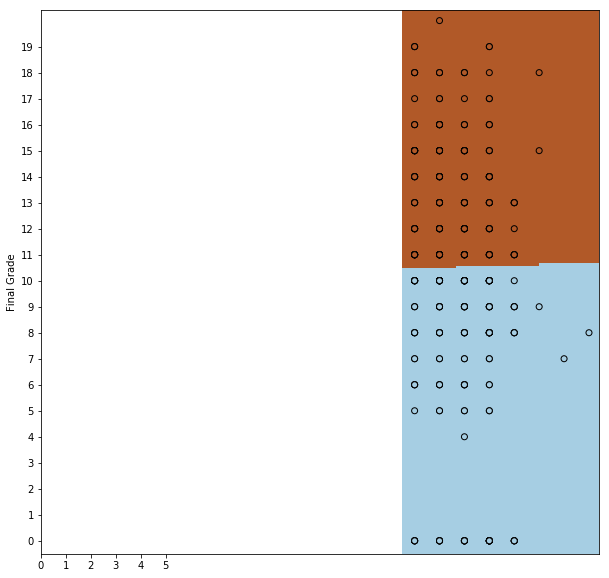

   Medu  G3
0     4   6
1     1   6
2     1  10
3     4  15
4     3  10
2


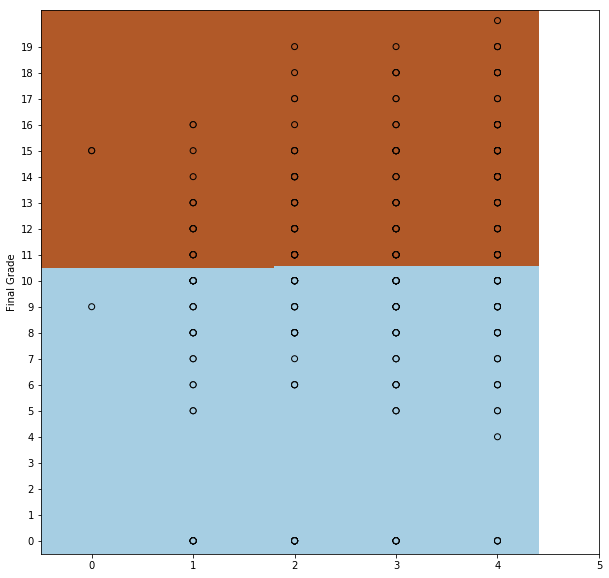

   Fedu  G3
0     4   6
1     1   6
2     1  10
3     2  15
4     3  10
3


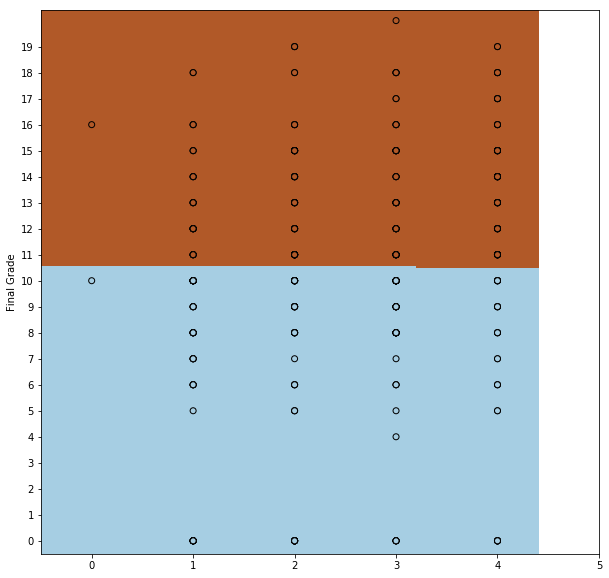

   traveltime  G3
0           2   6
1           1   6
2           1  10
3           1  15
4           1  10
4


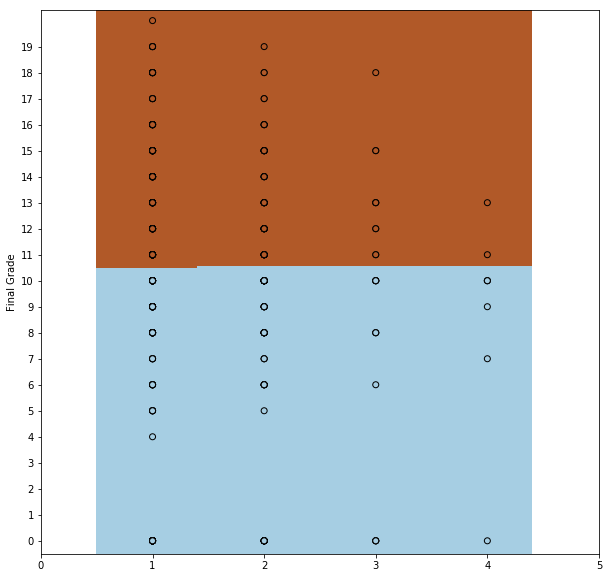

   studytime  G3
0          2   6
1          2   6
2          2  10
3          3  15
4          2  10
5


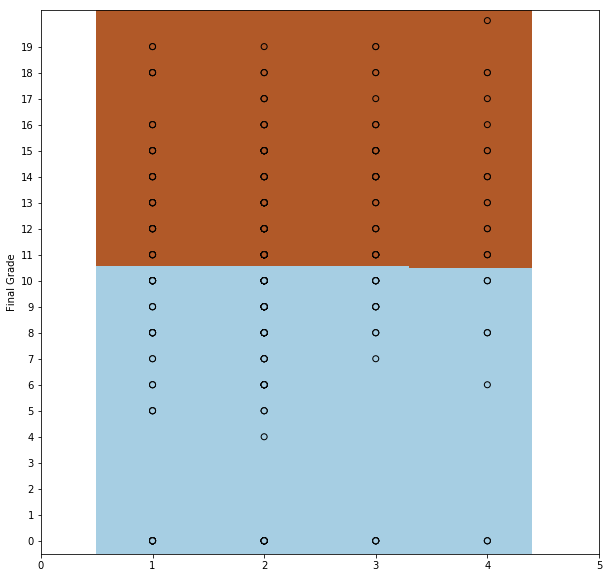

   failures  G3
0         0   6
1         0   6
2         3  10
3         0  15
4         0  10
6


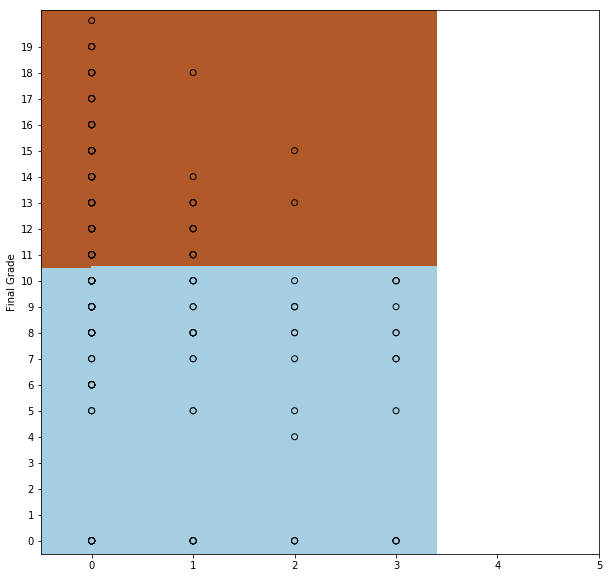

   famrel  G3
0       4   6
1       5   6
2       4  10
3       3  15
4       4  10
7


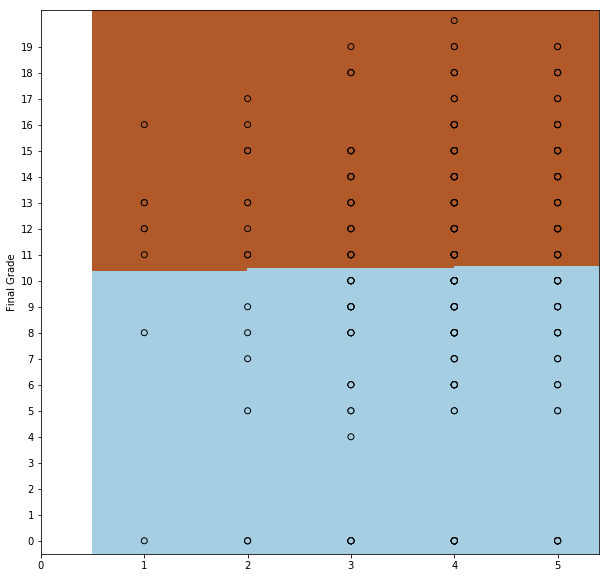

   freetime  G3
0         3   6
1         3   6
2         3  10
3         2  15
4         3  10
8


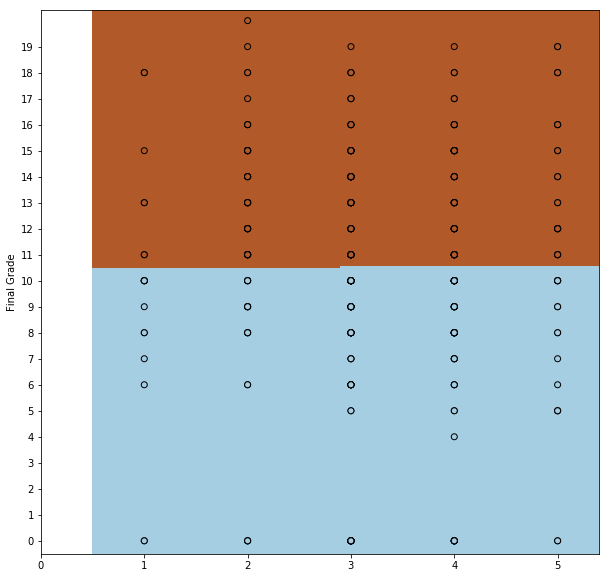

   goout  G3
0      4   6
1      3   6
2      2  10
3      2  15
4      2  10
9


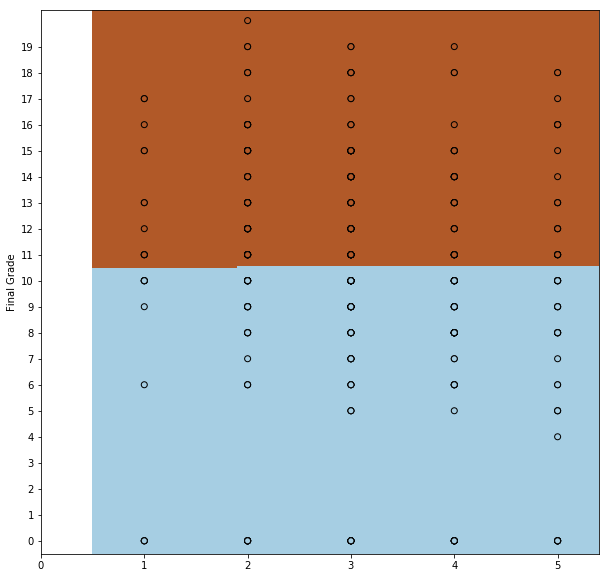

   Dalc  G3
0     1   6
1     1   6
2     2  10
3     1  15
4     1  10
10


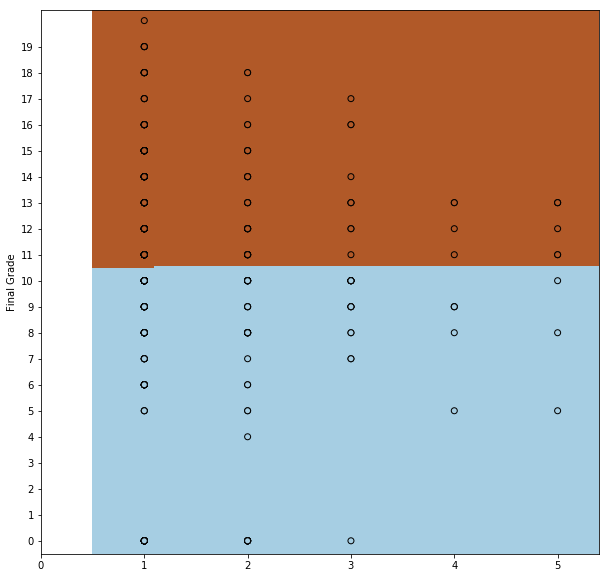

   Walc  G3
0     1   6
1     1   6
2     3  10
3     1  15
4     2  10
11


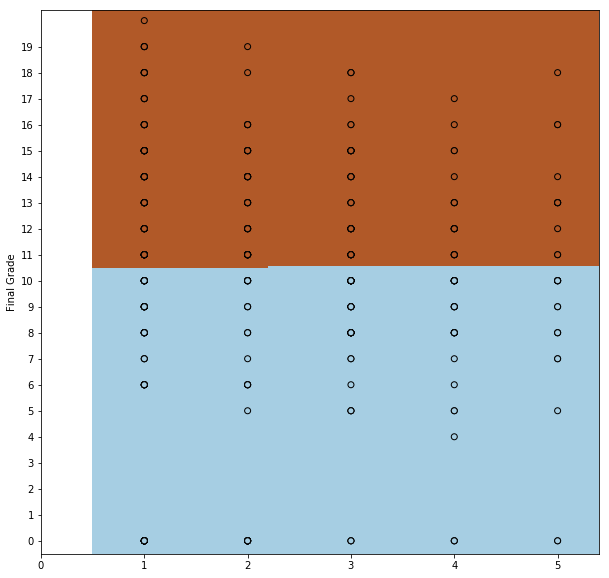

   health  G3
0       3   6
1       3   6
2       3  10
3       5  15
4       5  10
12


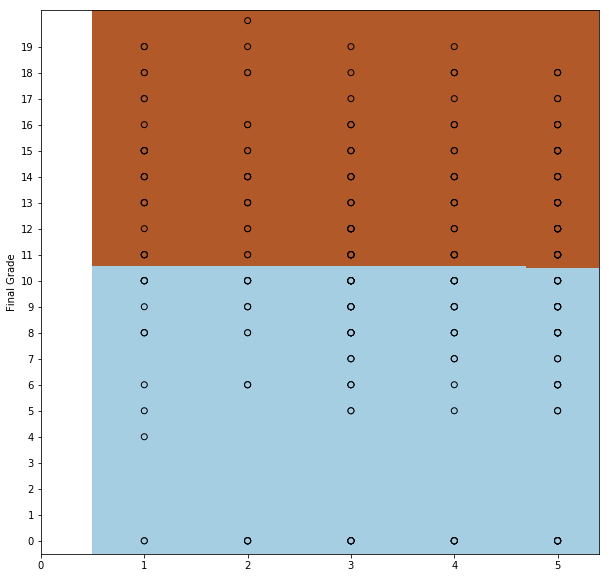

   absences  G3
0         6   6
1         4   6
2        10  10
3         2  15
4         4  10
13


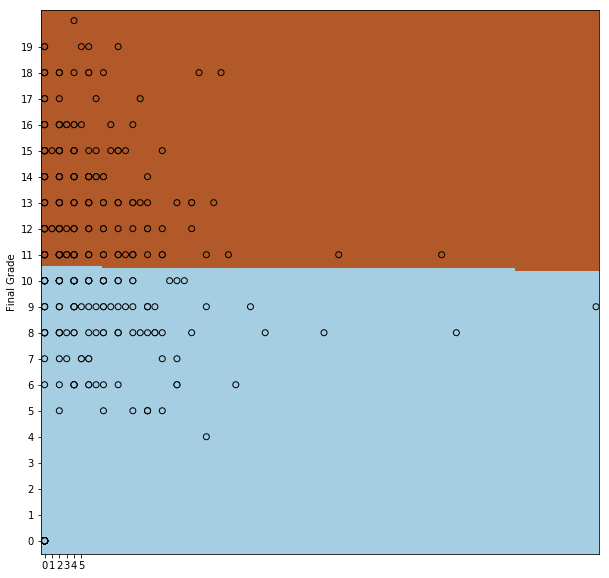

   G1  G3
0   5   6
1   5   6
2   7  10
3  15  15
4   6  10
14


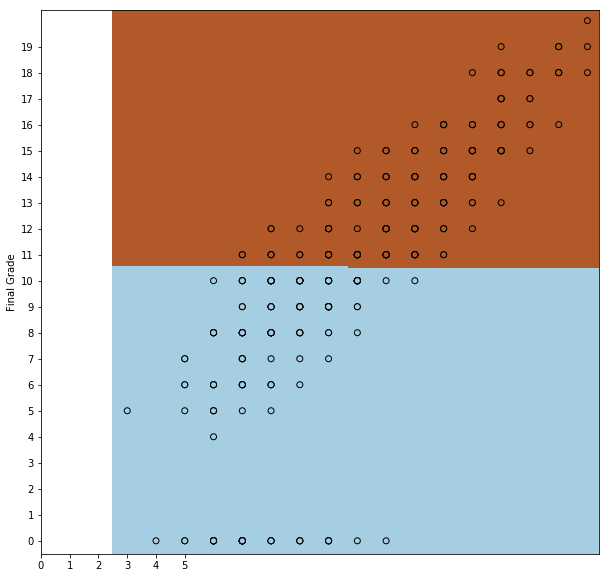

   G2  G3
0   6   6
1   5   6
2   8  10
3  14  15
4  10  10
15


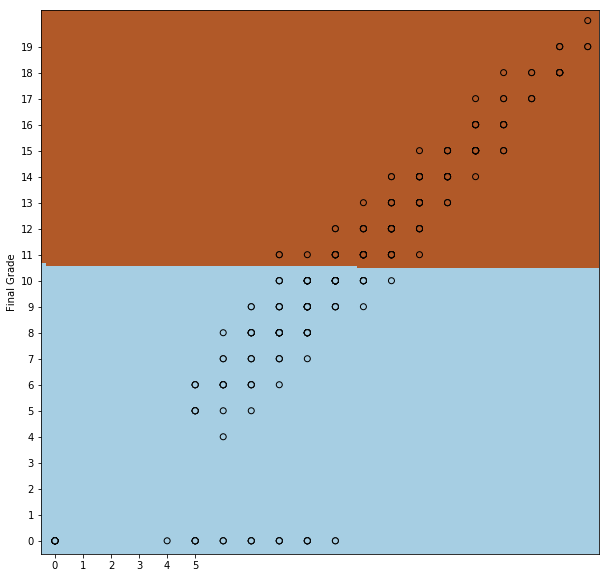

   G3  G3
0   6   6
1   6   6
2  10  10
3  15  15
4  10  10
16


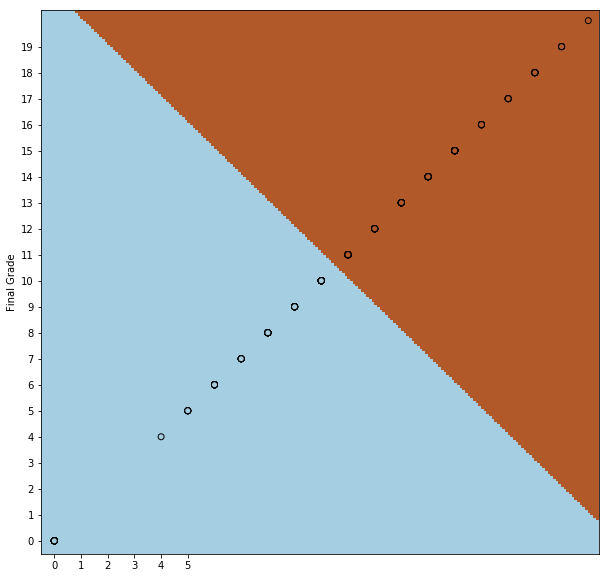

   school_GP  G3
0          1   6
1          1   6
2          1  10
3          1  15
4          1  10
17


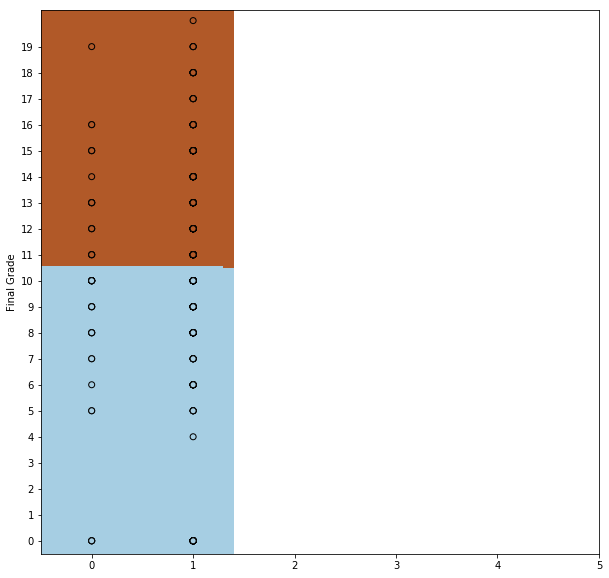

   school_MS  G3
0          0   6
1          0   6
2          0  10
3          0  15
4          0  10
18


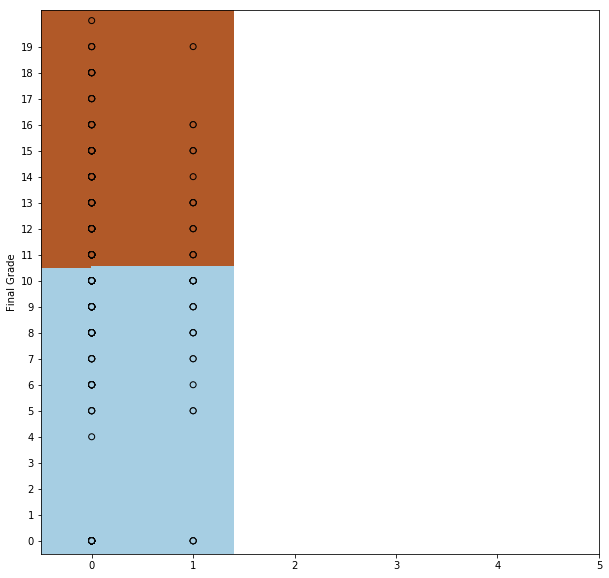

   sex_F  G3
0      1   6
1      1   6
2      1  10
3      1  15
4      1  10
19


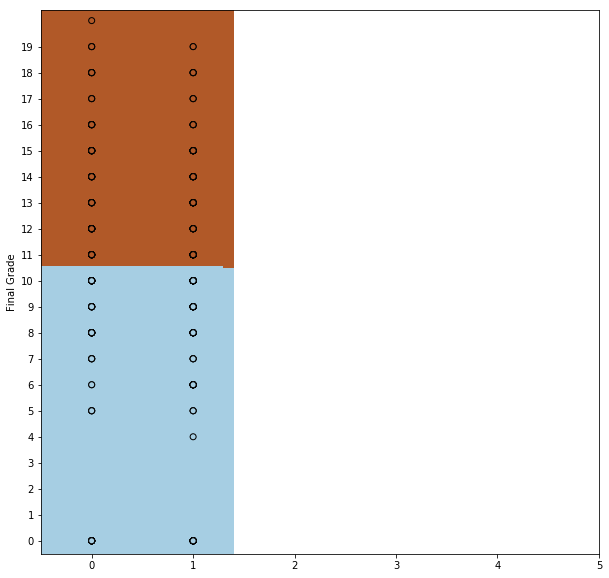

   sex_M  G3
0      0   6
1      0   6
2      0  10
3      0  15
4      0  10
20


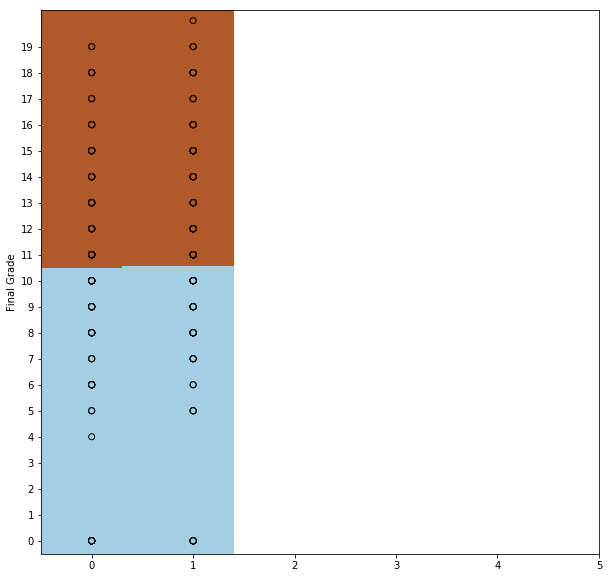

   address_R  G3
0          0   6
1          0   6
2          0  10
3          0  15
4          0  10
21


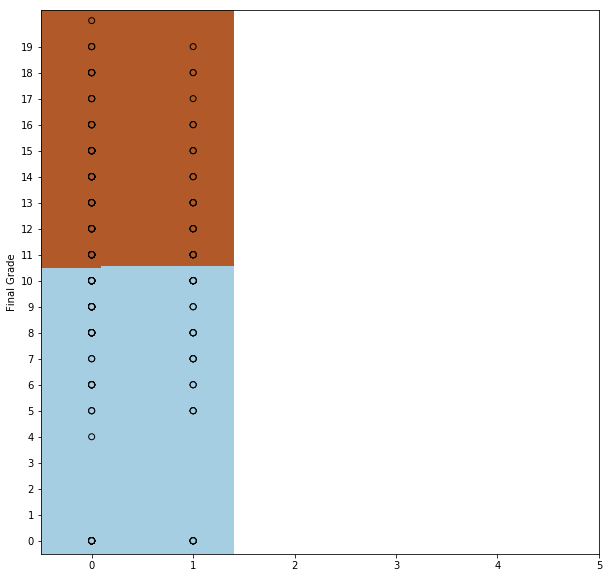

   address_U  G3
0          1   6
1          1   6
2          1  10
3          1  15
4          1  10
22


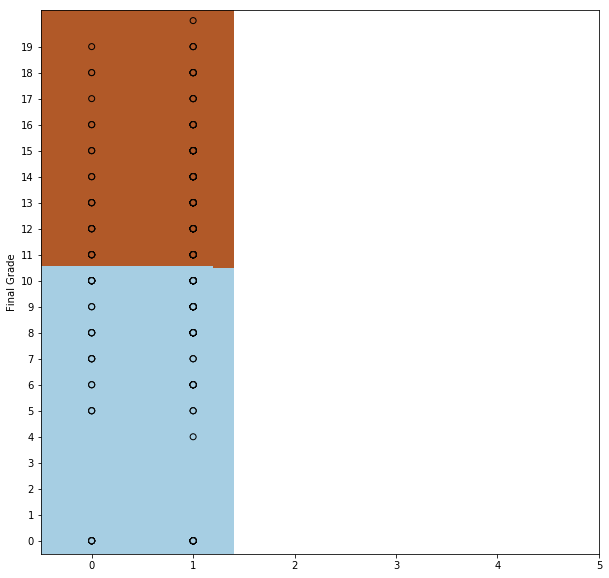

   famsize_GT3  G3
0            1   6
1            1   6
2            0  10
3            1  15
4            1  10
23


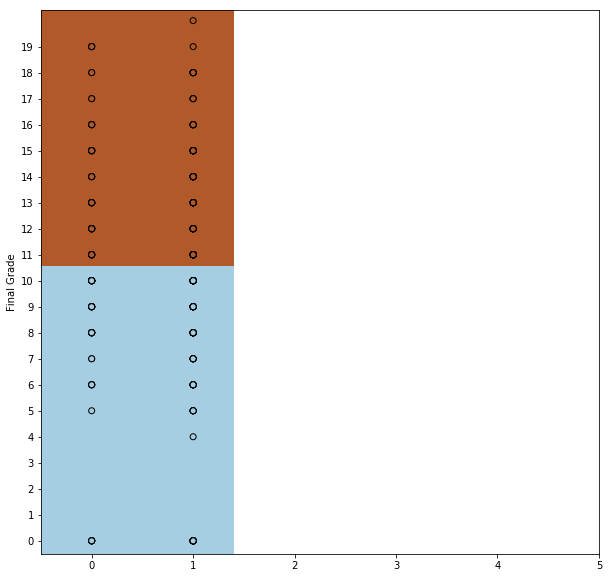

   famsize_LE3  G3
0            0   6
1            0   6
2            1  10
3            0  15
4            0  10
24


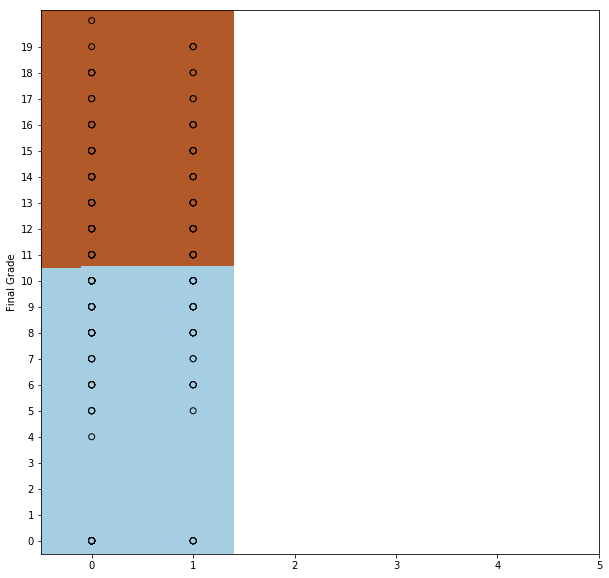

   Pstatus_A  G3
0          1   6
1          0   6
2          0  10
3          0  15
4          0  10
25


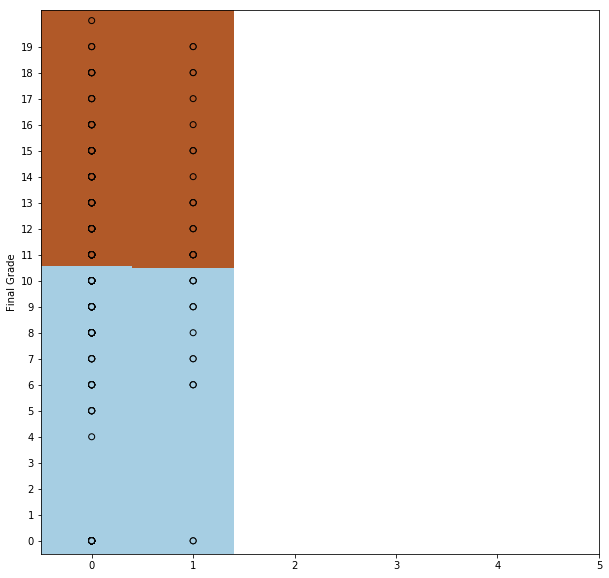

   Pstatus_T  G3
0          0   6
1          1   6
2          1  10
3          1  15
4          1  10
26


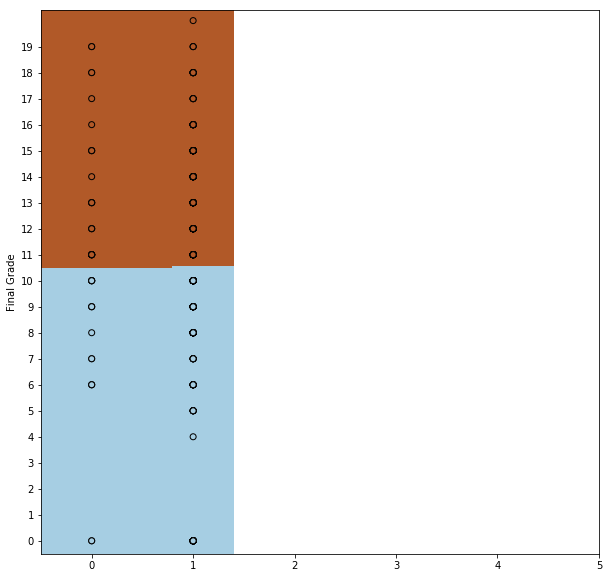

   Mjob_at_home  G3
0             1   6
1             1   6
2             1  10
3             0  15
4             0  10
27


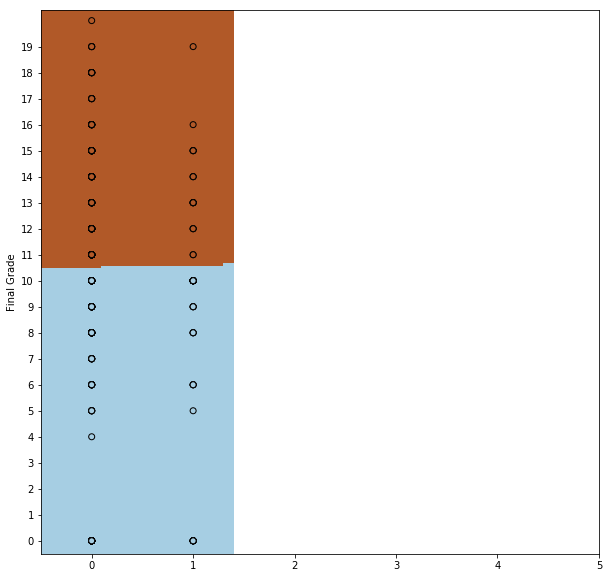

   Mjob_health  G3
0            0   6
1            0   6
2            0  10
3            1  15
4            0  10
28


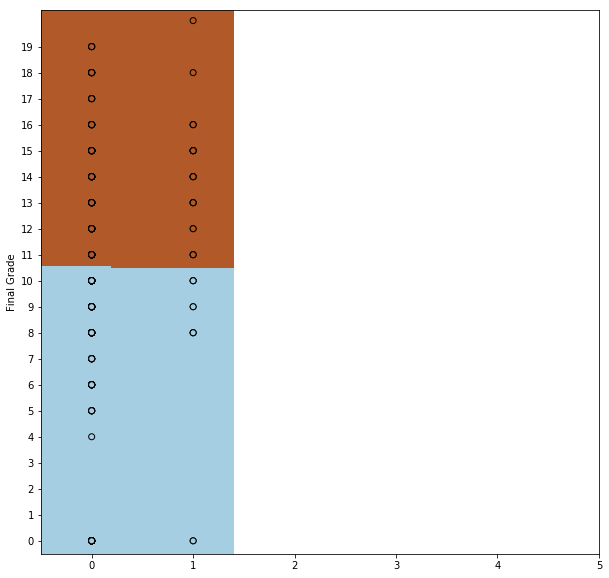

   Mjob_other  G3
0           0   6
1           0   6
2           0  10
3           0  15
4           1  10
29


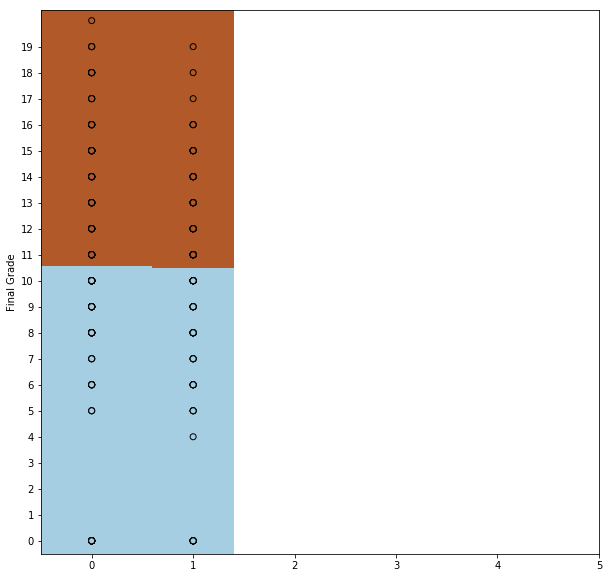

   Mjob_services  G3
0              0   6
1              0   6
2              0  10
3              0  15
4              0  10
30


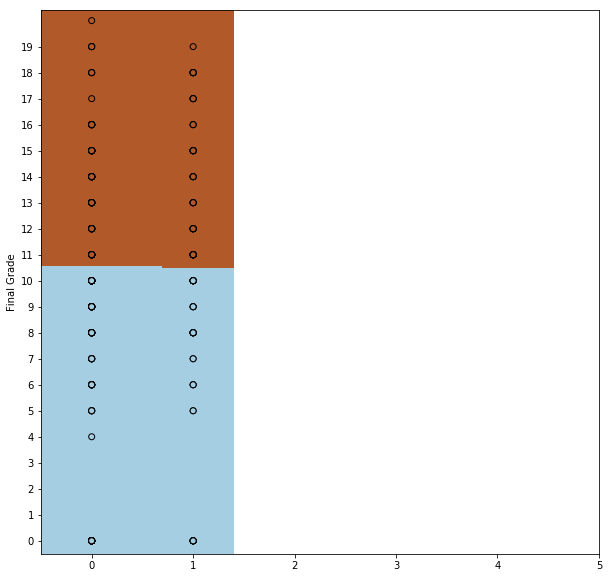

   Mjob_teacher  G3
0             0   6
1             0   6
2             0  10
3             0  15
4             0  10
31


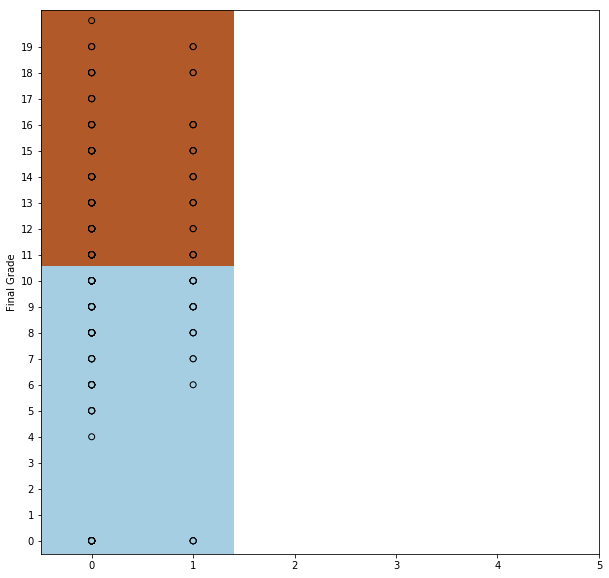

   Fjob_at_home  G3
0             0   6
1             0   6
2             0  10
3             0  15
4             0  10
32


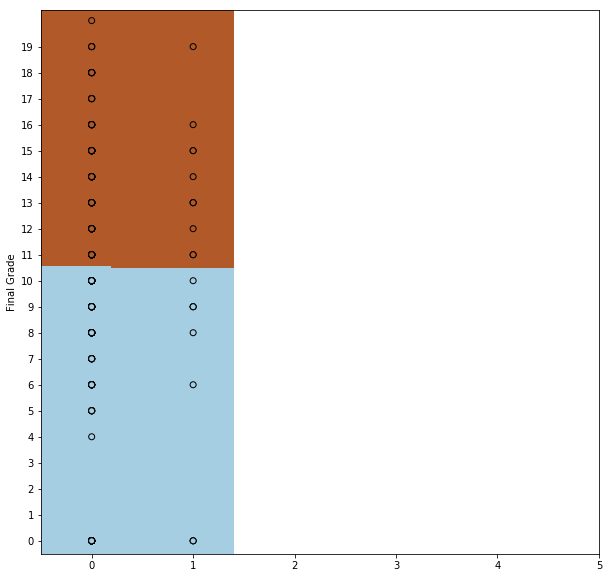

   Fjob_health  G3
0            0   6
1            0   6
2            0  10
3            0  15
4            0  10
33


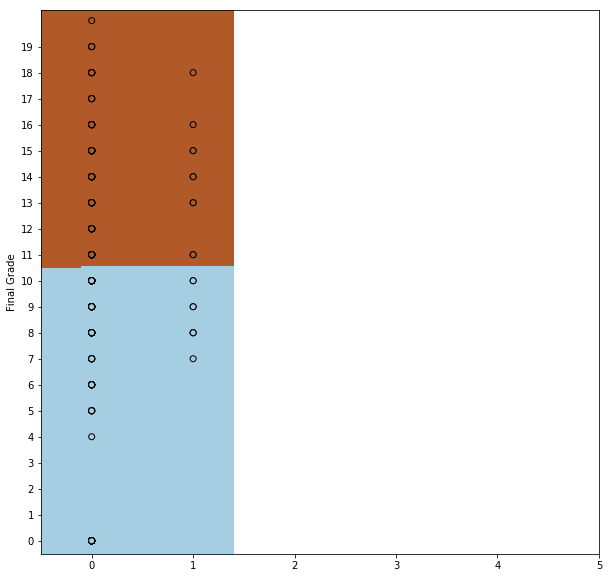

   Fjob_other  G3
0           0   6
1           1   6
2           1  10
3           0  15
4           1  10
34


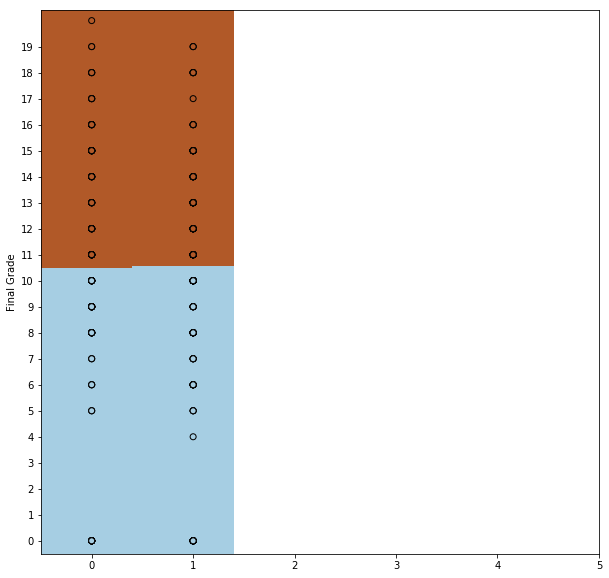

   Fjob_services  G3
0              0   6
1              0   6
2              0  10
3              1  15
4              0  10
35


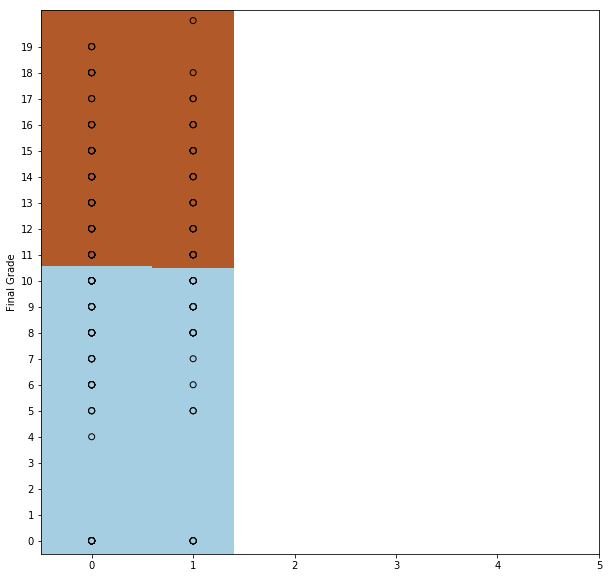

   Fjob_teacher  G3
0             1   6
1             0   6
2             0  10
3             0  15
4             0  10
36


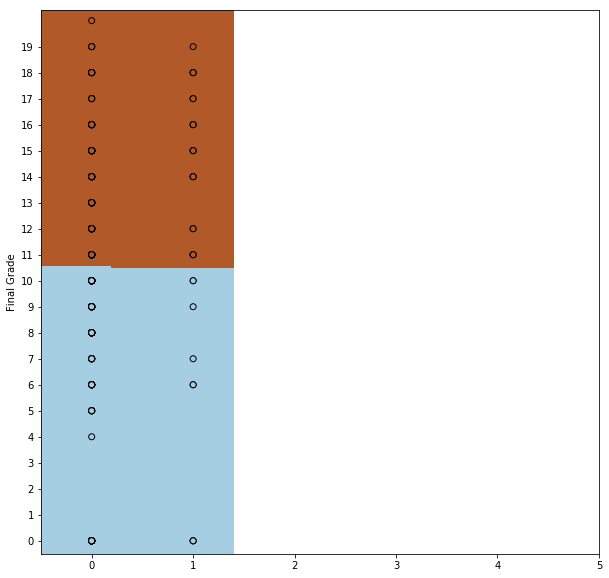

   reason_course  G3
0              1   6
1              1   6
2              0  10
3              0  15
4              0  10
37


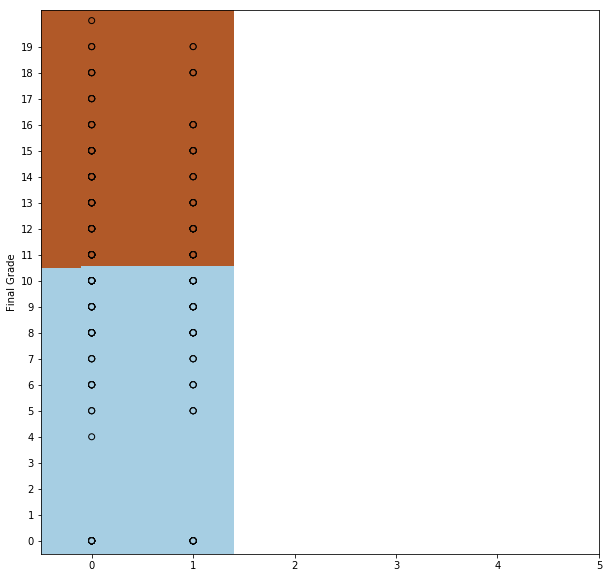

   reason_home  G3
0            0   6
1            0   6
2            0  10
3            1  15
4            1  10
38


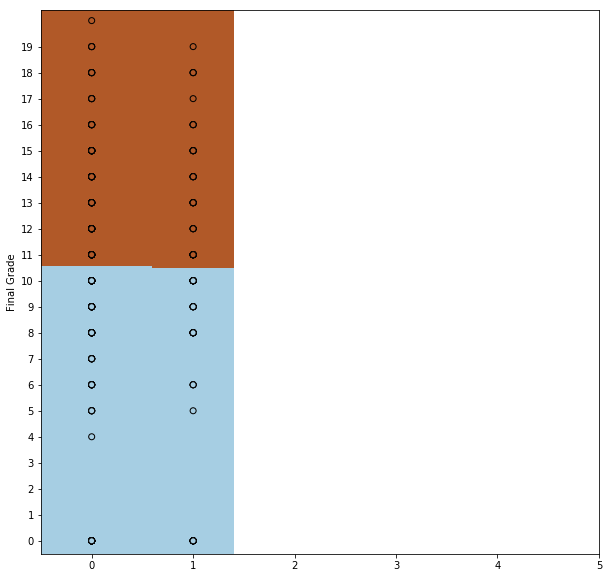

   reason_other  G3
0             0   6
1             0   6
2             1  10
3             0  15
4             0  10
39


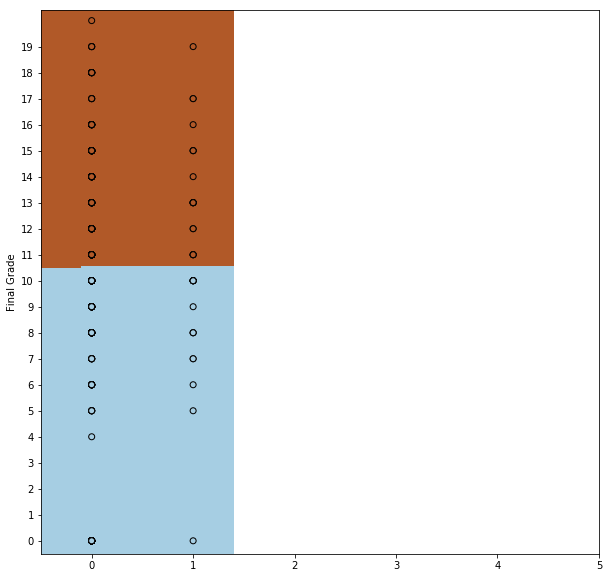

   reason_reputation  G3
0                  0   6
1                  0   6
2                  0  10
3                  0  15
4                  0  10
40


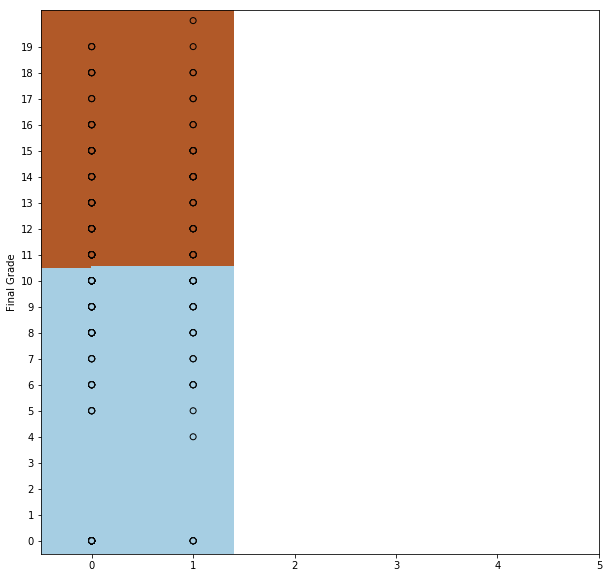

   guardian_father  G3
0                0   6
1                1   6
2                0  10
3                0  15
4                1  10
41


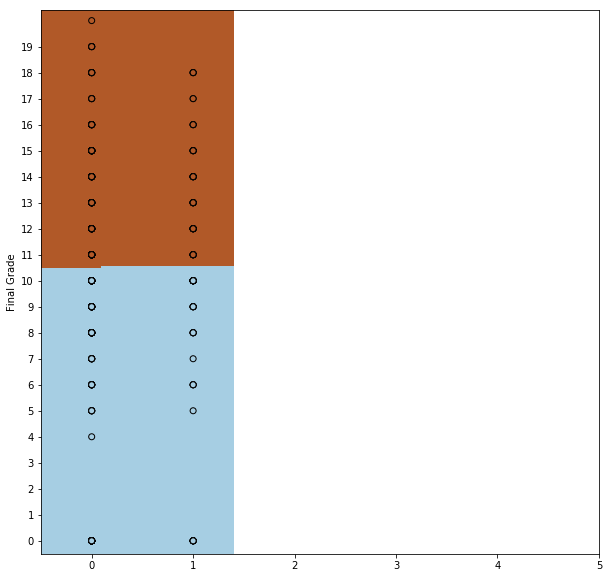

   guardian_mother  G3
0                1   6
1                0   6
2                1  10
3                1  15
4                0  10
42


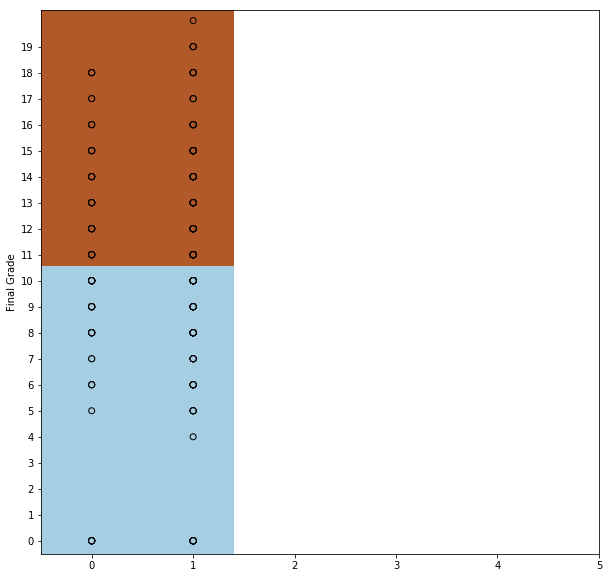

   guardian_other  G3
0               0   6
1               0   6
2               0  10
3               0  15
4               0  10
43


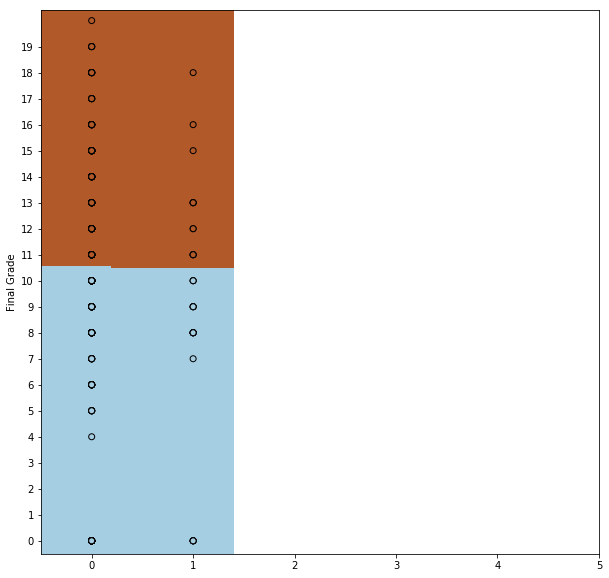

   schoolsup_no  G3
0             0   6
1             1   6
2             0  10
3             1  15
4             1  10
44


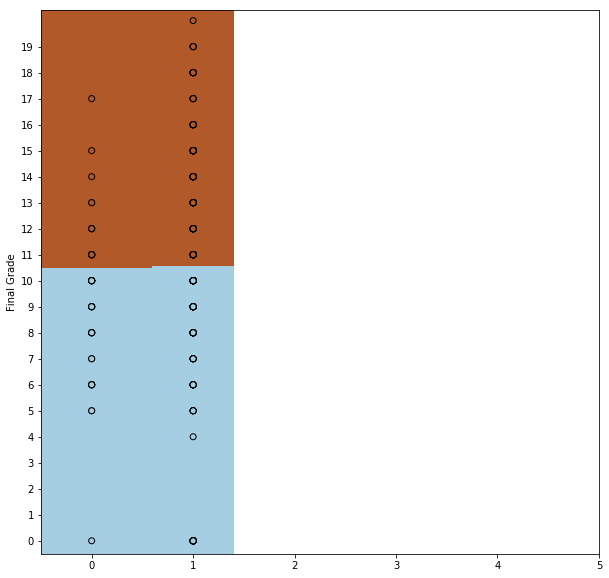

   schoolsup_yes  G3
0              1   6
1              0   6
2              1  10
3              0  15
4              0  10
45


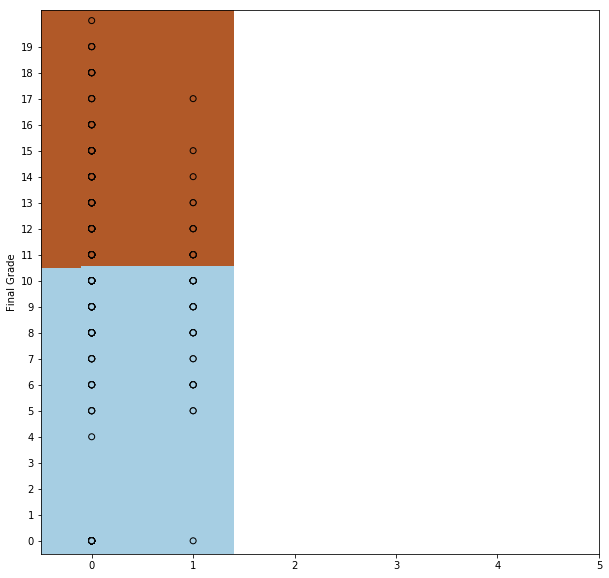

   famsup_no  G3
0          1   6
1          0   6
2          1  10
3          0  15
4          0  10
46


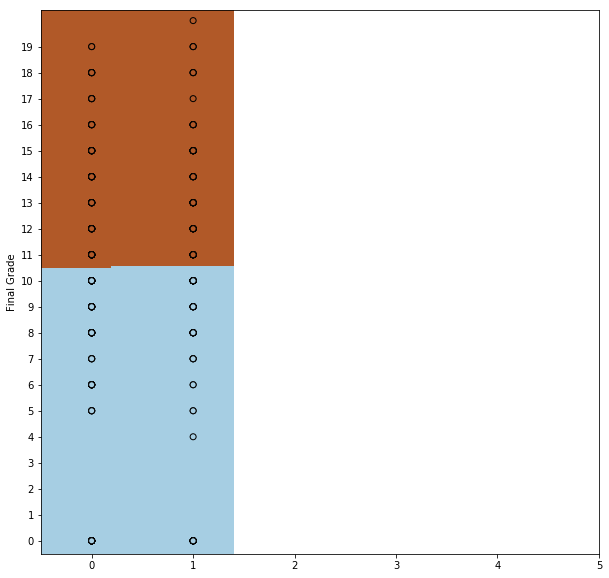

   famsup_yes  G3
0           0   6
1           1   6
2           0  10
3           1  15
4           1  10
47


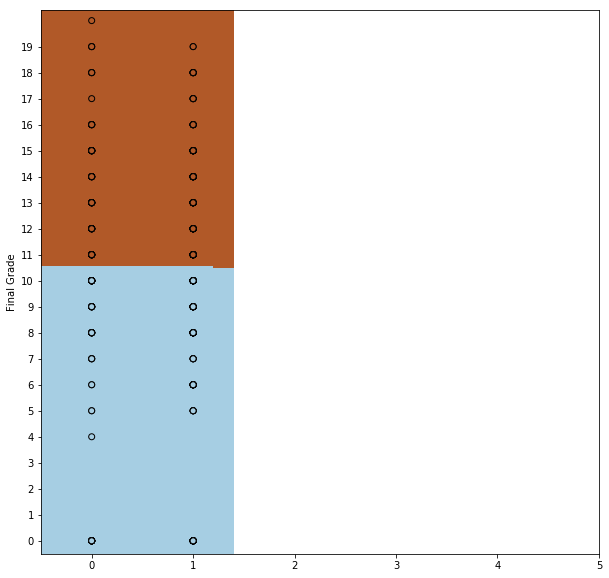

   paid_no  G3
0        1   6
1        1   6
2        0  10
3        0  15
4        0  10
48


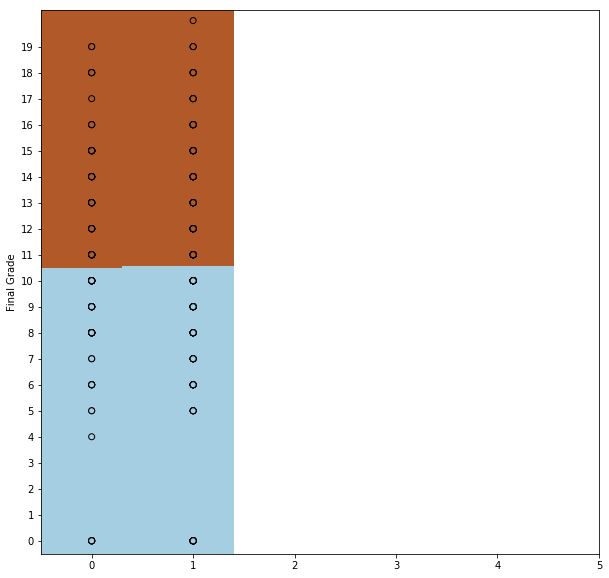

   paid_yes  G3
0         0   6
1         0   6
2         1  10
3         1  15
4         1  10
49


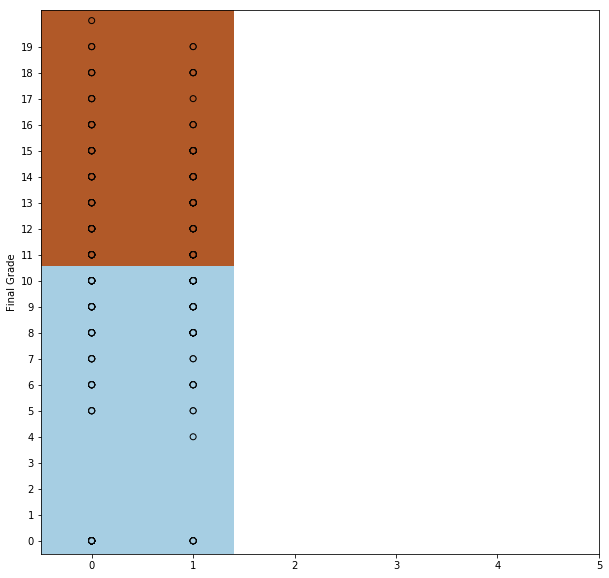

   activities_no  G3
0              1   6
1              1   6
2              1  10
3              0  15
4              1  10
50


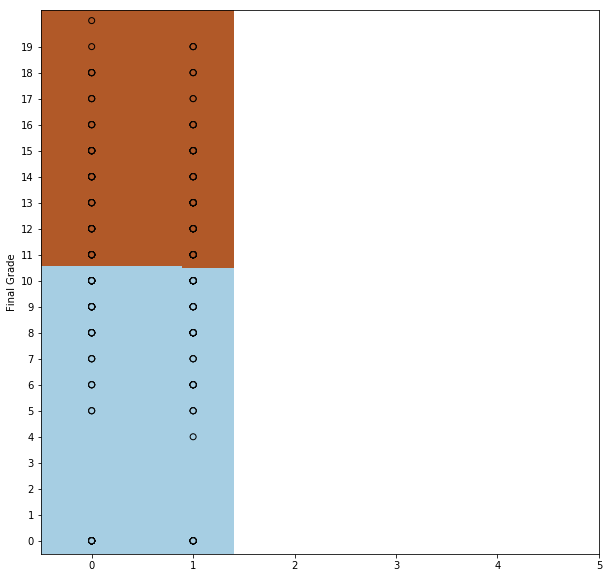

   activities_yes  G3
0               0   6
1               0   6
2               0  10
3               1  15
4               0  10
51


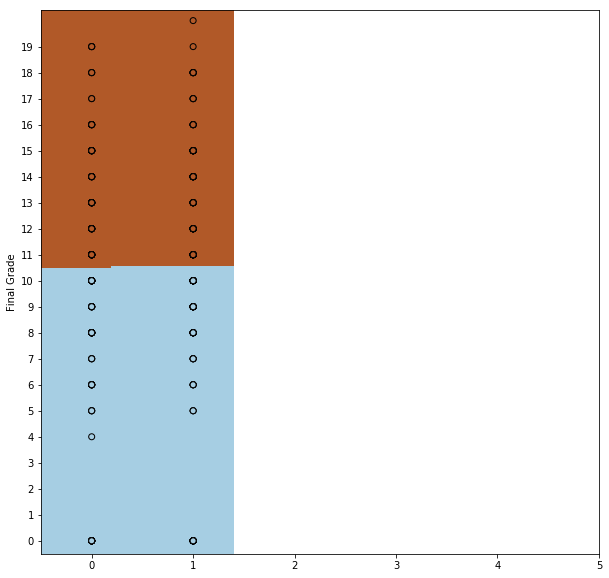

   nursery_no  G3
0           0   6
1           1   6
2           0  10
3           0  15
4           0  10
52


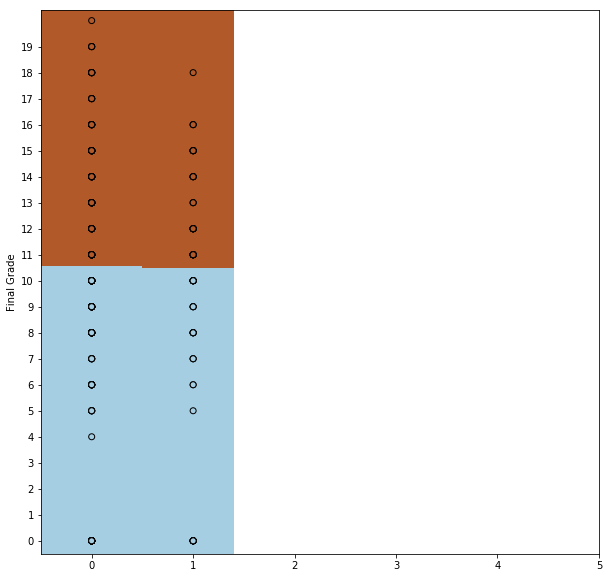

   nursery_yes  G3
0            1   6
1            0   6
2            1  10
3            1  15
4            1  10
53


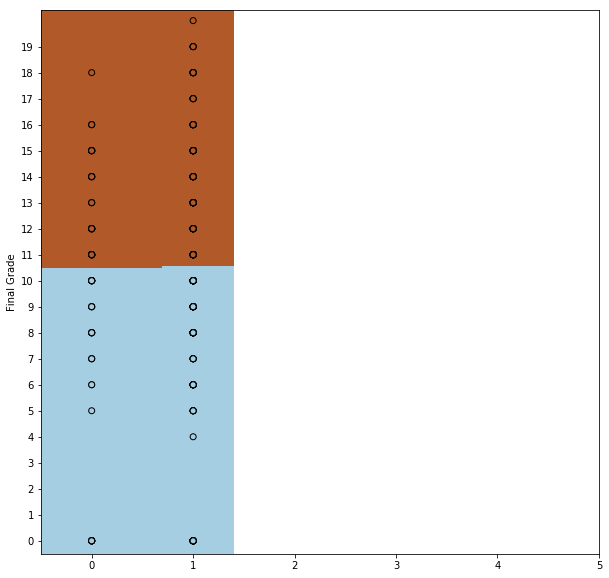

   higher_no  G3
0          0   6
1          0   6
2          0  10
3          0  15
4          0  10
54


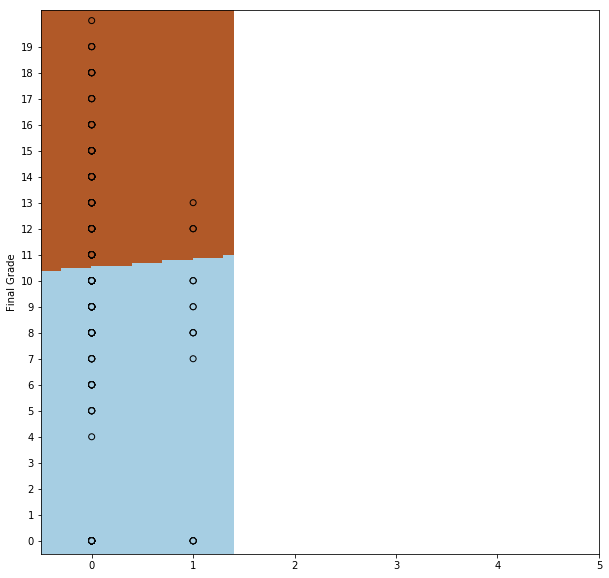

   higher_yes  G3
0           1   6
1           1   6
2           1  10
3           1  15
4           1  10
55


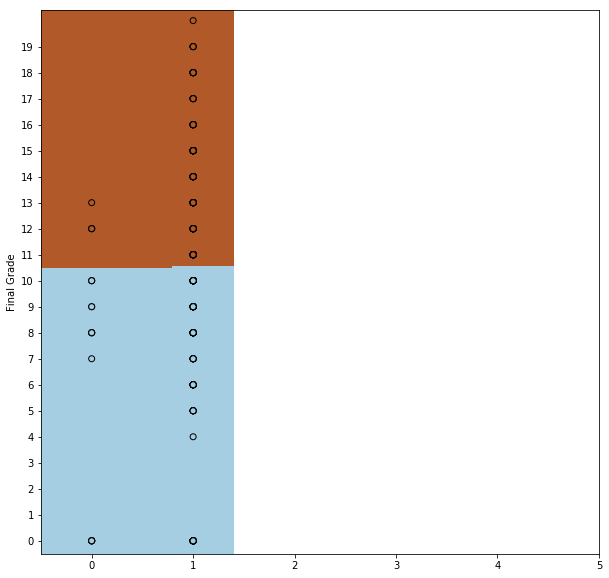

   internet_no  G3
0            1   6
1            0   6
2            0  10
3            0  15
4            1  10
56


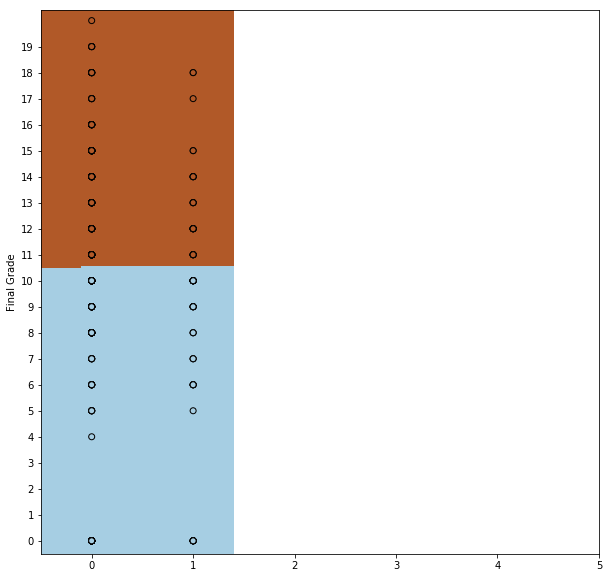

   internet_yes  G3
0             0   6
1             1   6
2             1  10
3             1  15
4             0  10
57


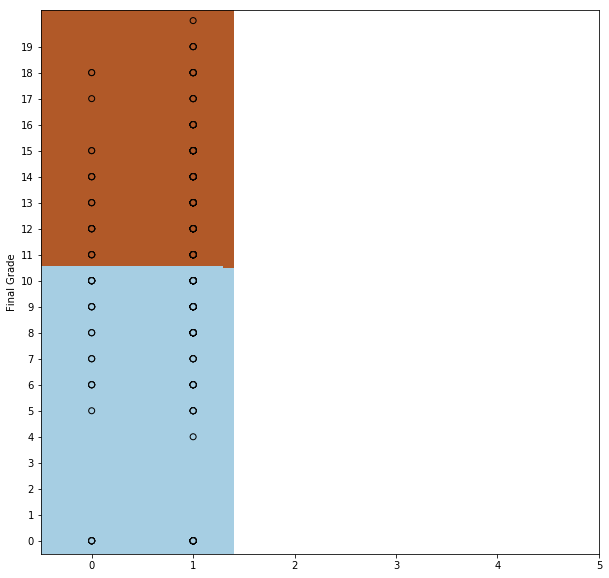

   romantic_no  G3
0            1   6
1            1   6
2            1  10
3            0  15
4            1  10
58


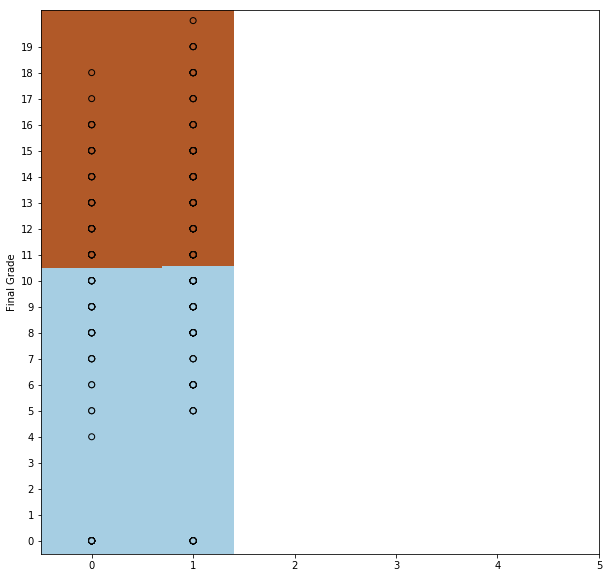

   romantic_yes  G3
0             0   6
1             0   6
2             0  10
3             1  15
4             0  10
59


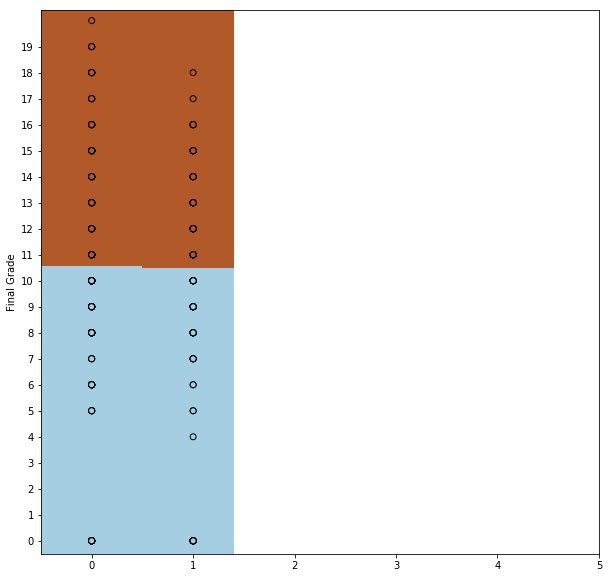

In [7]:
from pylab import *

h = 0.1
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins
count = 1
# iterates through all features
for i in range(59):
    X_math = math_data.iloc[:, :]  # features
    Y_math = math_data.iloc[:, -1]  # class
    X_math = pd.get_dummies(X_math)
    X_math = X_math.iloc[:, [i,15]] #create classifier using age and study time
    print(X_math.head())
    
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X_math, bins)
    print(count)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_math.iloc[:, 0].min() - .5, X_math.iloc[:, 0].max() + .5
    y_min, y_max = X_math.iloc[:, 1].min() - .5, X_math.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    #y_pred = logreg.predict(X_math.iloc[:, 0:1])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=bins, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("")
    plt.ylabel('Final Grade')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks((arange(6) ))
    plt.yticks(( arange(20)))

    plt.show()
    count = count + 1

# Feature Importance

In [8]:
from pylab import *
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins

X_math = math_data.iloc[:, :-1]  # features
X_math = pd.get_dummies(X_math)

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_math/ np.std(X_math, 0), bins)

coeff = logreg.coef_
for i in range(58):
    print("Feature %d, %s: %f " % (i, X_math.columns.values[i], coeff[0][i]))
    #print("")
print(coeff[0].argsort())

Feature 0, age: -11.252858 
Feature 1, Medu: -26.971162 
Feature 2, Fedu: 18.028821 
Feature 3, traveltime: -6.992716 
Feature 4, studytime: -18.579360 
Feature 5, failures: -11.629201 
Feature 6, famrel: -1.118749 
Feature 7, freetime: 13.747727 
Feature 8, goout: 4.202446 
Feature 9, Dalc: -2.586166 
Feature 10, Walc: -26.743721 
Feature 11, health: -10.173865 
Feature 12, absences: -8.762717 
Feature 13, G1: 30.030394 
Feature 14, G2: 209.560568 
Feature 15, school_GP: 8.676368 
Feature 16, school_MS: -31.418633 
Feature 17, sex_F: -5.358667 
Feature 18, sex_M: -9.252095 
Feature 19, address_R: 1.807646 
Feature 20, address_U: -19.338974 
Feature 21, famsize_GT3: 0.526310 
Feature 22, famsize_LE3: -16.626084 
Feature 23, Pstatus_A: -6.829972 
Feature 24, Pstatus_T: -17.088409 
Feature 25, Mjob_at_home: -16.100827 
Feature 26, Mjob_health: -6.845706 
Feature 27, Mjob_other: -10.880842 
Feature 28, Mjob_services: 2.668077 
Feature 29, Mjob_teacher: 12.447752 
Feature 30, Fjob_at_home:

In [9]:
best = [2, 7, 29, 57, 50]
worst = [ 1 ,10, 51, 56, 42] 
count = 1

print("Most indicative of Good Grades:")
for i in best:
    print(" %d %s: %f" % (count, X_math.columns.values[i], coeff[0][i]))
    count = count + 1
    
print("")
print("Most indicative of Bad Grades:")
count = 1    
for i in worst:
    print(" %d %s: %f" % (count, X_math.columns.values[i], coeff[0][i]))
    count = count + 1

Most indicative of Good Grades:
 1 Fedu: 18.028821
 2 freetime: 13.747727
 3 Mjob_teacher: 12.447752
 4 romantic_yes: 7.115668
 5 nursery_no: 5.846449

Most indicative of Bad Grades:
 1 Medu: -26.971162
 2 Walc: -26.743721
 3 nursery_yes: -23.914779
 4 romantic_no: -22.581045
 5 schoolsup_no: -20.033346


# Precision

In [10]:
from sklearn.metrics import precision_score
h = .02  # step size in the mesh
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins


X_math = math_data  # features
Y_math = math_data.iloc[:, -1]  # class
X_math = pd.get_dummies(X_math)
#X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X_math, bins, test_size=0.3)

total = 0
count = 0

for i in range(13):
    #X_math = X_math.iloc[:, [i,15]] #create classifier using age and study time
    for j in range(13):
        x_train2 = x_train.iloc[:,[i,j]]
        x_test2 = x_test.iloc[:,[i,j]]
        #print(x_train.head())

        logreg = linear_model.LogisticRegression(C=1e5)
        logreg.fit(x_train2, y_train)

        
        y_predictDTC = logreg.predict(x_test2)

        #find accuracy of classifiers
        acc = precision_score(y_test, y_predictDTC)
        total += acc
        count += 1
            
print("average precision: {}".format(total/count))

KeyboardInterrupt: 

## Portuguese Data

In [ ]:
from pylab import *

h = 0.01
bins = pd.cut(Y_port, 2, labels=False) #bin the final grade data into 2 bins

# iterates through all features
for i in range(59):
    X_port = port_data.iloc[:, :]  # features
    Y_port = port_data.iloc[:, -1]  # class
    X_port = pd.get_dummies(X_port)
    X_port = X_port.iloc[:, [i,15]] #create classifier using age and study time
    print(X_port.head())
    
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X_port, bins)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_port.iloc[:, 0].min() - .5, X_port.iloc[:, 0].max() + .5
    y_min, y_max = X_port.iloc[:, 1].min() - .5, X_port.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    #y_pred = logreg.predict(X_math.iloc[:, 0:1])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_port.iloc[:, 0], X_port.iloc[:, 1], c=bins, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Weekday Alcohol Consumption')
    plt.ylabel('Final Grade')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks((arange(6) ))
    plt.yticks(( arange(20)))

    plt.show()

# Feature Importance

In [ ]:
from pylab import *
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins

X_math = math_data.iloc[:, :-1]  # features
X_math = pd.get_dummies(X_math)
#X_math = X_math.iloc[:, :-1] #create classifier using age and study time

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_math/ np.std(X_math, 0), bins)

coeff = logreg.coef_
for i in range(30):
    print("Feature %d, %s: %f " % (i, math_data.columns.values[i], coeff[0][i]))
    #print("")
print(coeff[0].argsort())

In [ ]:
best = [14, 13, 2, 7, 29]
worst = [16, 1 ,10] #, 51, 56
count = 1

print("Most indicative of Good Grades:")
for i in best:
    print(" %d %s: %f" % (count, port_data.columns.values[i], coeff[0][i]))
    count = count + 1
    
print("")
print("Most indicative of Bad Grades:")
count = 1    
for i in worst:
    print(" %d %s: %f" % (count, port_data.columns.values[i], coeff[0][i]))
    count = count + 1
print(" 4 extracurriculars")
print(" 5 no internet")

# Precision 

In [ ]:
from sklearn.metrics import precision_score
h = .02  # step size in the mesh
bins = pd.cut(Y_port, 2, labels=False) #bin the final grade data into 2 bins


X_port = port_data  # features
Y_port = port_data.iloc[:, -1]  # class
X_port = pd.get_dummies(X_port)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X_port, bins, test_size=0.3)

total = 0
count = 0

for i in range(13):
    for j in range(13):
        x_train2 = x_train.iloc[:,[i,j]]
        x_test2 = x_test.iloc[:,[i,j]]
        #print(x_train.head())

        logreg = linear_model.LogisticRegression(C=1e5)
        logreg.fit(x_train2, y_train)

        
        y_predictDTC = logreg.predict(x_test2)

        #find accuracy of classifiers
        acc = precision_score(y_test, y_predictDTC)
        total += acc
        count += 1
            
print("average precision: {}".format(total/count))

# Random Forest 

## Math Data

In [ ]:
h = .02  # step size in the mesh

X_math = pd.get_dummies(X_math)
print(X_math.head())
X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time
math_rfc = RandomForestClassifier(max_depth=4)
math_rfc.fit(X_math, Y_math)
print(X_math.head())

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_math.iloc[:, 0].min() - 1, X_math.iloc[:, 0].max() + 1
y_min, y_max = X_math.iloc[:, 1].min() - 1, X_math.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = math_rfc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Random Forest Classifier")

# Feature Importance

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc      ...       activities_no  activities_yes  nursery_no  nursery_yes  \
0     1      ...                   1               0           0            1   
1     1      ...                   1               0           1            0   
2     2      ...                   1               0           0            1   
3     1      ...                   0               1           0            1   
4     1      ...                   1               0           0            1   

   higher_no  higher_yes  intern

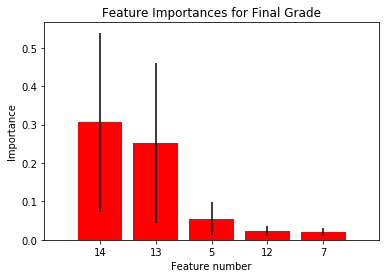

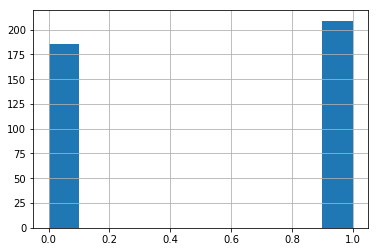

In [12]:
#FEATURE IMPORTANCE
h = .02  # step size in the mesh
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins


X_math = math_data.iloc[:, :-1]  # features
X_math = pd.get_dummies(X_math)
#X_math = X_math.iloc[:, :-1] #create classifier using age and study time
print(X_math.head())

math_rfc = RandomForestClassifier()
math_rfc.fit(X_math, bins)

importances = math_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in math_rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:5]
headers = X_math.dtypes.index

print("Feature ranking:")

for f in range(5):
    print("%d. %s (feature %d): %f" % (f + 1, headers[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances for Final Grade")
plt.bar(range(5), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(5), indices)
plt.xlim([-1, 5])
plt.xlabel("Feature number")
plt.ylabel("Importance")
plt.show()

#END OF FEATURE IMPORTANCE

bins.hist()

# Precision Score

In [ ]:
from sklearn.metrics import precision_score
h = .02  # step size in the mesh
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins


X_math = math_data  # features
Y_math = math_data.iloc[:, -1]  # class
X_math = pd.get_dummies(X_math)
#X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X_math, bins, test_size=0.3)

total = 0
count = 0

for i in range(13):
    #X_math = X_math.iloc[:, [i,15]] #create classifier using age and study time
    for j in range(13):
        x_train2 = x_train.iloc[:,[i,j]]
        x_test2 = x_test.iloc[:,[i,j]]
        #print(x_train.head())

        math_rfc = RandomForestClassifier()
        math_rfc.fit(x_train2, y_train)
        
        y_predictDTC = math_rfc.predict(x_test2)

        #find accuracy of classifiers
        acc = precision_score(y_test, y_predictDTC)
        total += acc
        count += 1
        '''
        if (acc > 0.6):
            print("{} + {} precision: {:.3f}".format(headers[i], headers[j], acc))
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            x_min, x_max = x_test2.iloc[:, 0].min() - 1, x_test2.iloc[:, 0].max() + 1
            y_min, y_max = x_test2.iloc[:, 1].min() - 1, x_test2.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
            Z = math_rfc.predict(np.c_[xx.ravel(), yy.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            plt.figure()
            plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

            # Plot also the training points
            plt.scatter(x_train2.iloc[:, 0], x_train2.iloc[:, 1], c=y_train, cmap=cmap_bold)
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())
            plt.title("Random Forest Classifier")
            plt.xlabel(headers[i])
            plt.ylabel(headers[j])
        '''
            
print("average precision: {}".format(total/count))

In [ ]:
my_colors = ['g', 'b', 'r', 'c']
pl1 = pd.plotting.scatter_matrix(math_data.iloc[:, :15], figsize=(10,10), color=my_colors, s=100)